# Origem dos Dados - Residuos Sólidos Urbanos

Os dados utilizados foram obtidos no portal da Prefeitura de São Paulo, no endereço:
http://dados.prefeitura.sp.gov.br/it/dataset/coleta-de-residuos-solidos-urbanos, abrangendo os anos de 2013 a 2020.

Foi realizado um pré-processamento dos datasets, que contêm informações sobre a quantidade total de resíduos sólidos urbanos coletados — tanto no geral quanto por tipo de resíduo — expressa em toneladas. A coleta foi realizada por empresas e concessionárias integrantes do Sistema de Limpeza Urbana do município de São Paulo durante o período citado.

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.   Pré-processamento de dados

### Ano de 2013

#### Leitura e entendimento dos dados

In [2]:
df_2013 = pd.read_csv("amlurbcoletatiposresiduos2013.csv", encoding="latin1", sep=';')

print("\n\nNome das colunas do dataset de 2013:\n\n")
print(df_2013.columns)

print("\n\nTamanho (linhas, colunas) do dataset de 2013:\n\n")
print(df_2013.shape)

print("\n\nConteúdo das 21 linhas do dataset de 2013:\n\n")
print(df_2013.head(21))



Nome das colunas do dataset de 2013:


Index(['TIPO DE RESÖDUO', 'jan/13', 'fev/13', 'mar/13', 'abr/13', 'mai/13',
       'jun/13', 'jul/13', 'ago/13', 'set/13', 'out/13', 'nov/13', 'dez/13',
       'TOTAL 2013'],
      dtype='object')


Tamanho (linhas, colunas) do dataset de 2013:


(21, 14)


Conteúdo das 21 linhas do dataset de 2013:


             TIPO DE RESÖDUO     jan/13     fev/13     mar/13     abr/13  \
0                 DOMICILIAR  329811,17  306900,44  319322,64  323370,88   
1         ENTULHO MECANIZADO   87669,43   73157,94   77888,83   84883,83   
2                   DIVERSOS   27656,96   28013,76   28353,69   28778,87   
3       RESIDUOS DE PISCINAO   17920,76   15869,30   18458,67   20398,73   
4                     ESGOTO   14130,25   13338,40   10632,08    6214,34   
5       RESIDUOS DE CORREGOS   12697,76   14798,90   18422,85   20407,91   
6                   VARRICAO   10590,98   11234,33   10345,45    9622,10   
7             ENTULHO MANUAL    5987,05    5339,

#### Limpeza de dados

In [3]:
# Renomeação da coluna com caractere especial
df_2013.rename(columns={'TIPO DE RESÖDUO': 'TIPO DE RESIDUO'}, inplace=True)

# Remoção das linhas com "TOTAL" ou "VAZIO"
df_2013 = df_2013[df_2013['TIPO DE RESIDUO'].notna()]
df_2013 = df_2013[df_2013['TIPO DE RESIDUO'].str.upper() != 'TOTAL']
df_2013 = df_2013[df_2013['TIPO DE RESIDUO'].str.upper() != '(VAZIO)']

# Remoção da coluna com "TOTAL"
del df_2013['TOTAL 2013']

print(df_2013.columns)

Index(['TIPO DE RESIDUO', 'jan/13', 'fev/13', 'mar/13', 'abr/13', 'mai/13',
       'jun/13', 'jul/13', 'ago/13', 'set/13', 'out/13', 'nov/13', 'dez/13'],
      dtype='object')


#### Transformação de dados

In [4]:
padrao_mes_ano = re.compile(r'^[a-zA-Z]{3}/\d{2}$')
colunas_mes_ano = [col for col in df_2013.columns if padrao_mes_ano.match(col.lower())]

# Conversão de valores para número
for col in colunas_mes_ano:
    df_2013[col] = df_2013[col].str.replace('.', '', regex=False)
    df_2013[col] = df_2013[col].str.replace(',', '.', regex=False)
    df_2013[col] = pd.to_numeric(df_2013[col], errors='coerce')

# Conversão para formato longo
df_2013_long = df_2013.melt(id_vars='TIPO DE RESIDUO', value_vars=colunas_mes_ano,
                  var_name='MES_ANO', value_name='TONELADAS')

# Dicionário de tradução (inglês para português)
meses_en_pt = {
    'jan': 'jan', 'feb': 'fev', 'mar': 'mar', 'apr': 'abr',
    'may': 'mai', 'jun': 'jun', 'jul': 'jul', 'aug': 'ago',
    'sep': 'set', 'oct': 'out', 'nov': 'nov', 'dec': 'dez'
}

# Tradução e separação das datas
df_2013_long['MES_ANO'] = df_2013_long['MES_ANO'].str.lower().replace(meses_en_pt, regex=True)

# Criação das colunas 'MES' e 'ANO'
df_2013_long['MES'] = df_2013_long['MES_ANO'].str.split('/').str[0]
df_2013_long['ANO'] = '20' + df_2013_long['MES_ANO'].str.split('/').str[1] # Adiciona '20' para o século

# Remove a coluna 'MES_ANO' original
df_2013_long.drop('MES_ANO', axis=1, inplace=True)

print(df_2013_long.head())

        TIPO DE RESIDUO  TONELADAS  MES   ANO
0            DOMICILIAR  329811.17  jan  2013
1    ENTULHO MECANIZADO   87669.43  jan  2013
2              DIVERSOS   27656.96  jan  2013
3  RESIDUOS DE PISCINAO   17920.76  jan  2013
4                ESGOTO   14130.25  jan  2013


#### Exportação para uso posterior

In [5]:
df_2013_long.to_csv('residuos_2013_transformado.csv', index=False)
df_2013_long.head(5)

,TIPO DE RESIDUO,TONELADAS,MES,ANO
0,DOMICILIAR,329811.17,jan,2013
1,ENTULHO MECANIZADO,87669.43,jan,2013
2,DIVERSOS,27656.96,jan,2013
3,RESIDUOS DE PISCINAO,17920.76,jan,2013
4,ESGOTO,14130.25,jan,2013


### Ano de 2014

#### Leitura e entendimento dos dados

In [6]:
df_2014 = pd.read_csv("amlurbcoletatiposresiduos2014.csv", encoding="latin1", sep=';')

print("\n\nNome das colunas do dataset de 2014:\n\n")
print(df_2014.columns)

print("\n\nTamanho (linhas, colunas) do dataset de 2014:\n\n")
print(df_2014.shape)

print("\n\nConteúdo das 19 linhas do dataset de 2014:\n\n")
print(df_2014.head(19))



Nome das colunas do dataset de 2014:


Index(['TIPO DE RESÖDUO', 'jan/14', 'fev/14', 'mar/14', 'abr/14', 'mai/14',
       'jun/14', 'jul/14', 'ago/14', 'set/14', 'out/14', 'nov/14', 'dez/14',
       'TOTAL 2014'],
      dtype='object')


Tamanho (linhas, colunas) do dataset de 2014:


(19, 14)


Conteúdo das 19 linhas do dataset de 2014:


                        TIPO DE RESÖDUO     jan/14      fev/14     mar/14  \
0                         ALIM VENCIDOS          0        7,44          0   
1                               ANIMAIS       9,83        7,07      11,43   
2                              DIVERSOS    30114,6    26562,65   30160,02   
3                            DOMICILIAR  333611,67   297097,79  317402,41   
4                    ENTULHO APREENDIDO        NaN         NaN        NaN   
5                        ENTULHO MANUAL    4027,01     3600,53    4314,61   
6                    ENTULHO MECANIZADO   76053,84    71028,51    70843,3   
7                                ESGOTO 

#### Limpeza de dados

In [7]:
# Renomeação da coluna com caractere especial
df_2014.rename(columns={'TIPO DE RESÖDUO': 'TIPO DE RESIDUO'}, inplace=True)

# Remoção das linhas com "TOTAL" ou "VAZIO"
df_2014 = df_2014[df_2014['TIPO DE RESIDUO'].notna()]
df_2014 = df_2014[df_2014['TIPO DE RESIDUO'].str.upper() != 'TOTAL']
df_2014 = df_2014[df_2014['TIPO DE RESIDUO'].str.upper() != '(VAZIO)']

# Remoção da coluna com "TOTAL"
del df_2014['TOTAL 2014']

print(df_2014.columns)

Index(['TIPO DE RESIDUO', 'jan/14', 'fev/14', 'mar/14', 'abr/14', 'mai/14',
       'jun/14', 'jul/14', 'ago/14', 'set/14', 'out/14', 'nov/14', 'dez/14'],
      dtype='object')


#### Transformação de dados

In [8]:
padrao_mes_ano = re.compile(r'^[a-zA-Z]{3}/\d{2}$')
colunas_mes_ano = [col for col in df_2014.columns if padrao_mes_ano.match(col.lower())]

# Conversão de valores para número
for col in colunas_mes_ano:
    df_2014[col] = df_2014[col].str.replace('.', '', regex=False)
    df_2014[col] = df_2014[col].str.replace(',', '.', regex=False)
    df_2014[col] = pd.to_numeric(df_2014[col], errors='coerce')

# Conversão para formato longo
df_2014_long = df_2014.melt(id_vars='TIPO DE RESIDUO', value_vars=colunas_mes_ano,
                  var_name='MES_ANO', value_name='TONELADAS')

# Dicionário de tradução (inglês para português)
meses_en_pt = {
    'jan': 'jan', 'feb': 'fev', 'mar': 'mar', 'apr': 'abr',
    'may': 'mai', 'jun': 'jun', 'jul': 'jul', 'aug': 'ago',
    'sep': 'set', 'oct': 'out', 'nov': 'nov', 'dec': 'dez'
}

# Tradução e separação das datas
df_2014_long['MES_ANO'] = df_2014_long['MES_ANO'].str.lower().replace(meses_en_pt, regex=True)

# Criação das colunas 'MES' e 'ANO'
df_2014_long['MES'] = df_2014_long['MES_ANO'].str.split('/').str[0]
df_2014_long['ANO'] = '20' + df_2014_long['MES_ANO'].str.split('/').str[1] # Adiciona '20' para o século

# Remove a coluna 'MES_ANO' original
df_2014_long.drop('MES_ANO', axis=1, inplace=True)

print(df_2014_long.head())

      TIPO DE RESIDUO  TONELADAS  MES   ANO
0       ALIM VENCIDOS       0.00  jan  2014
1             ANIMAIS       9.83  jan  2014
2            DIVERSOS   30114.60  jan  2014
3          DOMICILIAR  333611.67  jan  2014
4  ENTULHO APREENDIDO        NaN  jan  2014


#### Exportação para uso posterior

In [9]:
df_2014_long.to_csv('residuos_2014_transformado.csv', index=False)
df_2014_long.head(5)

,TIPO DE RESIDUO,TONELADAS,MES,ANO
0,ALIM VENCIDOS,0.00,jan,2014
1,ANIMAIS,9.83,jan,2014
2,DIVERSOS,30114.60,jan,2014
3,DOMICILIAR,333611.67,jan,2014
4,ENTULHO APREENDIDO,NaN,jan,2014


### Ano de 2015

#### Leitura e entendimento dos dados

In [10]:
df_2015 = pd.read_csv("amlurbcoletatiposresiduos2015.csv", encoding="latin1", sep=';')

print("\n\nNome das colunas do dataset de 2015:\n\n")
print(df_2015.columns)

print("\n\nTamanho (linhas, colunas) do dataset de 2015:\n\n")
print(df_2015.shape)

print("\n\nConteúdo das 21 linhas do dataset de 2015:\n\n")
print(df_2015.head(21))



Nome das colunas do dataset de 2015:


Index(['TIPO DE RESÍDUO', 'jan/15', 'fev/15', 'mar/15', 'abr/15', 'mai/15',
       'jun/15', 'jul/15', 'ago/15', 'set/15', 'out/15', 'nov/15', 'dez/15',
       'TOTAL 2015'],
      dtype='object')


Tamanho (linhas, colunas) do dataset de 2015:


(21, 14)


Conteúdo das 21 linhas do dataset de 2015:


                        TIPO DE RESÍDUO     jan/15     fev/15     mar/15  \
0                         ALIM VENCIDOS          0          0          0   
1                               ANIMAIS      12,08       4,57      10,19   
2                              DIVERSOS   29830,71   27443,26   30535,95   
3                         DIVERSOS-EMAE        NaN        NaN        NaN   
4                            DOMICILIAR  335743,47  299185,20  334651,22   
5                    ENTULHO APREENDIDO       8,19      35,22      10,82   
6                        ENTULHO MANUAL    4066,48    3508,05    3870,82   
7                    ENTULHO MECANIZADO   52555,

#### Limpeza de dados

In [11]:
# Renomeação da coluna com caractere especial
df_2015.rename(columns={'TIPO DE RESÍDUO': 'TIPO DE RESIDUO'}, inplace=True)

# Remoção das linhas com "TOTAL" ou "VAZIO"
df_2015 = df_2015[df_2015['TIPO DE RESIDUO'].notna()]
df_2015 = df_2015[df_2015['TIPO DE RESIDUO'].str.upper() != 'TOTAL']
df_2015 = df_2015[df_2015['TIPO DE RESIDUO'].str.upper() != '(VAZIO)']

# Remoção da coluna com "TOTAL"
del df_2015['TOTAL 2015']

print(df_2015.columns)


Index(['TIPO DE RESIDUO', 'jan/15', 'fev/15', 'mar/15', 'abr/15', 'mai/15',
       'jun/15', 'jul/15', 'ago/15', 'set/15', 'out/15', 'nov/15', 'dez/15'],
      dtype='object')


#### Transformação de dados

In [12]:
padrao_mes_ano = re.compile(r'^[a-zA-Z]{3}/\d{2}$')
colunas_mes_ano = [col for col in df_2015.columns if padrao_mes_ano.match(col.lower())]

# Conversão de valores para número
for col in colunas_mes_ano:
    df_2015[col] = df_2015[col].str.replace('.', '', regex=False)
    df_2015[col] = df_2015[col].str.replace(',', '.', regex=False)
    df_2015[col] = pd.to_numeric(df_2015[col], errors='coerce')

# Conversão para formato longo
df_2015_long = df_2015.melt(id_vars='TIPO DE RESIDUO', value_vars=colunas_mes_ano,
                  var_name='MES_ANO', value_name='TONELADAS')

# Dicionário de tradução (inglês para português)
meses_en_pt = {
    'jan': 'jan', 'feb': 'fev', 'mar': 'mar', 'apr': 'abr',
    'may': 'mai', 'jun': 'jun', 'jul': 'jul', 'aug': 'ago',
    'sep': 'set', 'oct': 'out', 'nov': 'nov', 'dec': 'dez'
}

# Tradução e separação das datas
df_2015_long['MES_ANO'] = df_2015_long['MES_ANO'].str.lower().replace(meses_en_pt, regex=True)

# Criação das colunas 'MES' e 'ANO'
df_2015_long['MES'] = df_2015_long['MES_ANO'].str.split('/').str[0]
df_2015_long['ANO'] = '20' + df_2015_long['MES_ANO'].str.split('/').str[1] # Adiciona '20' para o século

# Remove a coluna 'MES_ANO' original
df_2015_long.drop('MES_ANO', axis=1, inplace=True)

print(df_2015_long.head())

  TIPO DE RESIDUO  TONELADAS  MES   ANO
0   ALIM VENCIDOS       0.00  jan  2015
1         ANIMAIS      12.08  jan  2015
2        DIVERSOS   29830.71  jan  2015
3   DIVERSOS-EMAE        NaN  jan  2015
4      DOMICILIAR  335743.47  jan  2015


#### Exportação para uso posterior

In [13]:
df_2015_long.to_csv('residuos_2015_transformado.csv', index=False)
df_2015_long.head(5)

,TIPO DE RESIDUO,TONELADAS,MES,ANO
0,ALIM VENCIDOS,0.00,jan,2015
1,ANIMAIS,12.08,jan,2015
2,DIVERSOS,29830.71,jan,2015
3,DIVERSOS-EMAE,NaN,jan,2015
4,DOMICILIAR,335743.47,jan,2015


### Ano de 2016

#### Leitura e entendimento dos dados

In [14]:
df_2016 = pd.read_csv("amlurbcoletatiposresiduos2016.csv", encoding="latin1", sep=';')

print("\n\nNome das colunas do dataset de 2016:\n\n")
print(df_2016.columns)

print("\n\nTamanho (linhas, colunas) do dataset de 2016:\n\n")
print(df_2016.shape)

print("\n\nConteúdo das 24 linhas do dataset de 2016:\n\n")
print(df_2016.head(24))



Nome das colunas do dataset de 2016:


Index(['TIPO DE RESÍDUO', 'jan/16', 'fev/16', 'mar/16', 'abr/16', 'mai/16',
       'jun/16', 'jul/16', 'ago/16', 'set/16', 'out/16', 'nov/16', 'dez/16',
       'TOTAL 2016'],
      dtype='object')


Tamanho (linhas, colunas) do dataset de 2016:


(24, 14)


Conteúdo das 24 linhas do dataset de 2016:


                                      TIPO DE RESÍDUO     jan/16     fev/16  \
0                                             ANIMAIS       7,27       8,97   
1                                            DIVERSOS   32631,94   30273,91   
2                                       DIVERSOS-EMAE       0,00       6,70   
3                                          DOMICILIAR  308816,42  311090,90   
4                                  ENTULHO APREENDIDO       7,64       0,00   
5                                      ENTULHO MANUAL    4032,91    4968,60   
6                                  ENTULHO MECANIZADO   47739,85   35860,05   
7   EQUIPE DE EVENTOS ES

#### Limpeza de dados

In [15]:
# Renomeação da coluna com caractere especial
df_2016.rename(columns={'TIPO DE RESÍDUO': 'TIPO DE RESIDUO'}, inplace=True)

# Remoção das linhas com "TOTAL" ou "VAZIO"
df_2016 = df_2016[df_2016['TIPO DE RESIDUO'].notna()]
df_2016 = df_2016[df_2016['TIPO DE RESIDUO'].str.upper() != 'TOTAL']
df_2016 = df_2016[df_2016['TIPO DE RESIDUO'].str.upper() != '(VAZIO)']

# Remoção da coluna com "TOTAL"
del df_2016['TOTAL 2016']

print(df_2016.columns)


Index(['TIPO DE RESIDUO', 'jan/16', 'fev/16', 'mar/16', 'abr/16', 'mai/16',
       'jun/16', 'jul/16', 'ago/16', 'set/16', 'out/16', 'nov/16', 'dez/16'],
      dtype='object')


#### Transformação de dados

In [16]:
padrao_mes_ano = re.compile(r'^[a-zA-Z]{3}/\d{2}$')
colunas_mes_ano = [col for col in df_2016.columns if padrao_mes_ano.match(col.lower())]

# Conversão de valores para número
for col in colunas_mes_ano:
    df_2016[col] = df_2016[col].str.replace('.', '', regex=False)
    df_2016[col] = df_2016[col].str.replace(',', '.', regex=False)
    df_2016[col] = pd.to_numeric(df_2016[col], errors='coerce')

# Conversão para formato longo
df_2016_long = df_2016.melt(id_vars='TIPO DE RESIDUO', value_vars=colunas_mes_ano,
                  var_name='MES_ANO', value_name='TONELADAS')

# Dicionário de tradução (inglês para português)
meses_en_pt = {
    'jan': 'jan', 'feb': 'fev', 'mar': 'mar', 'apr': 'abr',
    'may': 'mai', 'jun': 'jun', 'jul': 'jul', 'aug': 'ago',
    'sep': 'set', 'oct': 'out', 'nov': 'nov', 'dec': 'dez'
}

# Tradução e separação das datas
df_2016_long['MES_ANO'] = df_2016_long['MES_ANO'].str.lower().replace(meses_en_pt, regex=True)

# Criação das colunas 'MES' e 'ANO'
df_2016_long['MES'] = df_2016_long['MES_ANO'].str.split('/').str[0]
df_2016_long['ANO'] = '20' + df_2016_long['MES_ANO'].str.split('/').str[1] # Adiciona '20' para o século

# Remove a coluna 'MES_ANO' original
df_2016_long.drop('MES_ANO', axis=1, inplace=True)

print(df_2016_long.head())

      TIPO DE RESIDUO  TONELADAS  MES   ANO
0             ANIMAIS       7.27  jan  2016
1            DIVERSOS   32631.94  jan  2016
2       DIVERSOS-EMAE       0.00  jan  2016
3          DOMICILIAR  308816.42  jan  2016
4  ENTULHO APREENDIDO       7.64  jan  2016


#### Exportação para uso posterior

In [17]:
df_2016_long.to_csv('residuos_2016_transformado.csv', index=False)
df_2016_long.head(5)

,TIPO DE RESIDUO,TONELADAS,MES,ANO
0,ANIMAIS,7.27,jan,2016
1,DIVERSOS,32631.94,jan,2016
2,DIVERSOS-EMAE,0.00,jan,2016
3,DOMICILIAR,308816.42,jan,2016
4,ENTULHO APREENDIDO,7.64,jan,2016


### Ano de 2017

#### Leitura e entendimento dos dados

In [18]:
df_2017 = pd.read_csv("amlurbcoletatiposresiduos2017.csv", encoding="latin1", sep=';')

print("\n\nNome das colunas do dataset de 2017:\n\n")
print(df_2017.columns)

print("\n\nTamanho (linhas, colunas) do dataset de 2017:\n\n")
print(df_2017.shape)

print("\n\nConteúdo das 23 linhas do dataset de 2017:\n\n")
print(df_2017.head(23))



Nome das colunas do dataset de 2017:


Index(['TIPO DE RESÍDUO', 'jan/17', 'fev/17', 'mar/17', 'abr/17', 'mai/17',
       'jun/17', 'jul/17', 'ago/17', 'set/17', 'out/17', 'nov/17', 'dez/17',
       'TOTAL 2017', 'Unnamed: 14'],
      dtype='object')


Tamanho (linhas, colunas) do dataset de 2017:


(23, 15)


Conteúdo das 23 linhas do dataset de 2017:


             TIPO DE RESÍDUO     jan/17     fev/17     mar/17     abr/17  \
0              ALIM VENCIDOS       1,37          0          0          0   
1                    ANIMAIS       2,87       1,91       2,48       1,76   
2                   DIVERSOS   18855,02   17572,45   20837,57   18557,36   
3                 DOMICILIAR  318691,59  286865,31  315652,06  283021,19   
4         ENTULHO APREENDIDO          0          0          0          0   
5             ENTULHO MANUAL    4817,97    5013,37    5445,18    3307,39   
6         ENTULHO MECANIZADO   24349,49   27260,35   31922,53   28697,93   
7                     ESGOTO   14

#### Limpeza de dados

In [19]:
# Renomeação da coluna com caractere especial
df_2017.rename(columns={'TIPO DE RESÍDUO': 'TIPO DE RESIDUO'}, inplace=True)

# Remoção das linhas com "TOTAL" ou "VAZIO"
df_2017 = df_2017[df_2017['TIPO DE RESIDUO'].notna()]
df_2017 = df_2017[df_2017['TIPO DE RESIDUO'].str.upper() != 'TOTAL']
df_2017 = df_2017[df_2017['TIPO DE RESIDUO'].str.upper() != '(VAZIO)']

# Remoção da coluna com "TOTAL"
del df_2017['TOTAL 2017']

print(df_2017.columns)

Index(['TIPO DE RESIDUO', 'jan/17', 'fev/17', 'mar/17', 'abr/17', 'mai/17',
       'jun/17', 'jul/17', 'ago/17', 'set/17', 'out/17', 'nov/17', 'dez/17',
       'Unnamed: 14'],
      dtype='object')


#### Transformação de dados

In [20]:
padrao_mes_ano = re.compile(r'^[a-zA-Z]{3}/\d{2}$')
colunas_mes_ano = [col for col in df_2017.columns if padrao_mes_ano.match(col.lower())]

# Conversão de valores para número
for col in colunas_mes_ano:
    df_2017[col] = df_2017[col].str.replace('.', '', regex=False)
    df_2017[col] = df_2017[col].str.replace(',', '.', regex=False)
    df_2017[col] = pd.to_numeric(df_2017[col], errors='coerce')

# Conversão para formato longo
df_2017_long = df_2017.melt(id_vars='TIPO DE RESIDUO', value_vars=colunas_mes_ano,
                  var_name='MES_ANO', value_name='TONELADAS')

# Dicionário de tradução (inglês para português)
meses_en_pt = {
    'jan': 'jan', 'feb': 'fev', 'mar': 'mar', 'apr': 'abr',
    'may': 'mai', 'jun': 'jun', 'jul': 'jul', 'aug': 'ago',
    'sep': 'set', 'oct': 'out', 'nov': 'nov', 'dec': 'dez'
}

# Tradução e separação das datas
df_2017_long['MES_ANO'] = df_2017_long['MES_ANO'].str.lower().replace(meses_en_pt, regex=True)

# Criação das colunas 'MES' e 'ANO'
df_2017_long['MES'] = df_2017_long['MES_ANO'].str.split('/').str[0]
df_2017_long['ANO'] = '20' + df_2017_long['MES_ANO'].str.split('/').str[1] # Adiciona '20' para o século

# Remove a coluna 'MES_ANO' original
df_2017_long.drop('MES_ANO', axis=1, inplace=True)

print(df_2017_long.head())

      TIPO DE RESIDUO  TONELADAS  MES   ANO
0       ALIM VENCIDOS       1.37  jan  2017
1             ANIMAIS       2.87  jan  2017
2            DIVERSOS   18855.02  jan  2017
3          DOMICILIAR  318691.59  jan  2017
4  ENTULHO APREENDIDO       0.00  jan  2017


#### Exportação para uso posterior

In [21]:
df_2017_long.to_csv('residuos_2017_transformado.csv', index=False)
df_2017_long.head(5)

,TIPO DE RESIDUO,TONELADAS,MES,ANO
0,ALIM VENCIDOS,1.37,jan,2017
1,ANIMAIS,2.87,jan,2017
2,DIVERSOS,18855.02,jan,2017
3,DOMICILIAR,318691.59,jan,2017
4,ENTULHO APREENDIDO,0.00,jan,2017


### Ano de 2018

#### Leitura e entendimento dos dados

In [22]:
df_2018 = pd.read_csv("amlurbcoletatiposresiduos2018.csv", encoding="latin1", sep=';')

print("\n\nNome das colunas do dataset de 2018:\n\n")
print(df_2018.columns)

print("\n\nTamanho (linhas, colunas) do dataset de 2018:\n\n")
print(df_2018.shape)

print("\n\nConteúdo das 22 linhas do dataset de 2018:\n\n")
print(df_2018.head(22))



Nome das colunas do dataset de 2018:


Index(['TIPO DE RESÍDUO', 'jan/18', 'fev/18', 'mar/18', 'abr/18', 'mai/18',
       'jun/18', 'jul/18', 'ago/18', 'set/18', 'out/18', 'nov/18', 'dez/18',
       'TOTAL 2018'],
      dtype='object')


Tamanho (linhas, colunas) do dataset de 2018:


(22, 14)


Conteúdo das 22 linhas do dataset de 2018:


             TIPO DE RESÍDUO     jan/18     fev/18     mar/18     abr/18  \
0              ALIM VENCIDOS          0          0          0          0   
1                    ANIMAIS       2,08       1,80       2,35       2,96   
2                   DIVERSOS   18644,22   18396,62   20431,31   21404,26   
3                 DOMICILIAR  364262,97  290663,37  328072,44  300843,73   
4         ENTULHO APREENDIDO      23,24      15,02      14,22          0   
5             ENTULHO MANUAL    4851,41    4490,55    5098,62    4639,78   
6         ENTULHO MECANIZADO   41901,74   39529,16   42499,88   41291,14   
7                     ESGOTO   19667,15   18039,

#### Limpeza de dados

In [23]:
# Renomeação da coluna com caractere especial
df_2018.rename(columns={'TIPO DE RESÍDUO': 'TIPO DE RESIDUO'}, inplace=True)

# Remoção das linhas com "TOTAL" ou "VAZIO"
df_2018 = df_2018[df_2018['TIPO DE RESIDUO'].notna()]
df_2018 = df_2018[df_2018['TIPO DE RESIDUO'].str.upper() != 'TOTAL']
df_2018 = df_2018[df_2018['TIPO DE RESIDUO'].str.upper() != '(VAZIO)']

# Remoção da coluna com "TOTAL"
del df_2018['TOTAL 2018']

print(df_2018.columns)

Index(['TIPO DE RESIDUO', 'jan/18', 'fev/18', 'mar/18', 'abr/18', 'mai/18',
       'jun/18', 'jul/18', 'ago/18', 'set/18', 'out/18', 'nov/18', 'dez/18'],
      dtype='object')


#### Transformação de dados

In [24]:
padrao_mes_ano = re.compile(r'^[a-zA-Z]{3}/\d{2}$')
colunas_mes_ano = [col for col in df_2018.columns if padrao_mes_ano.match(col.lower())]

# Conversão de valores para número
for col in colunas_mes_ano:
    df_2018[col] = df_2018[col].str.replace('.', '', regex=False)
    df_2018[col] = df_2018[col].str.replace(',', '.', regex=False)
    df_2018[col] = pd.to_numeric(df_2018[col], errors='coerce')

# Conversão para formato longo
df_2018_long = df_2018.melt(id_vars='TIPO DE RESIDUO', value_vars=colunas_mes_ano,
                  var_name='MES_ANO', value_name='TONELADAS')

# Dicionário de tradução (inglês para português)
meses_en_pt = {
    'jan': 'jan', 'feb': 'fev', 'mar': 'mar', 'apr': 'abr',
    'may': 'mai', 'jun': 'jun', 'jul': 'jul', 'aug': 'ago',
    'sep': 'set', 'oct': 'out', 'nov': 'nov', 'dec': 'dez'
}

# Tradução e separação das datas
df_2018_long['MES_ANO'] = df_2018_long['MES_ANO'].str.lower().replace(meses_en_pt, regex=True)

# Criação das colunas 'MES' e 'ANO'
df_2018_long['MES'] = df_2018_long['MES_ANO'].str.split('/').str[0]
df_2018_long['ANO'] = '20' + df_2018_long['MES_ANO'].str.split('/').str[1] # Adiciona '20' para o século

# Remove a coluna 'MES_ANO' original
df_2018_long.drop('MES_ANO', axis=1, inplace=True)

print(df_2018_long.head())

      TIPO DE RESIDUO  TONELADAS  MES   ANO
0       ALIM VENCIDOS       0.00  jan  2018
1             ANIMAIS       2.08  jan  2018
2            DIVERSOS   18644.22  jan  2018
3          DOMICILIAR  364262.97  jan  2018
4  ENTULHO APREENDIDO      23.24  jan  2018


#### Exportação para uso posterior

In [25]:
df_2018_long.to_csv('residuos_2018_transformado.csv', index=False)
df_2018_long.head(5)

,TIPO DE RESIDUO,TONELADAS,MES,ANO
0,ALIM VENCIDOS,0.00,jan,2018
1,ANIMAIS,2.08,jan,2018
2,DIVERSOS,18644.22,jan,2018
3,DOMICILIAR,364262.97,jan,2018
4,ENTULHO APREENDIDO,23.24,jan,2018


### Ano de 2019

#### Leitura e entendimento dos dados

In [26]:
df_2019 = pd.read_csv("amlurbcoletatiposresiduos2019.csv", encoding="latin1", sep=';')

print("\n\nNome das colunas do dataset de 2019:\n\n")
print(df_2019.columns)

print("\n\nTamanho (linhas, colunas) do dataset de 2019:\n\n")
print(df_2019.shape)

print("\n\nConteúdo das 30 linhas do dataset de 2019:\n\n")
print(df_2019.head(30))



Nome das colunas do dataset de 2019:


Index(['Tipo de resíduo - Toneladas', 'jan/19', 'fev/19', 'mar/19', 'abr/19',
       'mai/19', 'jun/19', 'jul/19', 'ago/19', 'set/19', 'out/19', 'nov/19',
       'dez/19', '2019'],
      dtype='object')


Tamanho (linhas, colunas) do dataset de 2019:


(30, 14)


Conteúdo das 30 linhas do dataset de 2019:


                          Tipo de resíduo - Toneladas   jan/19   fev/19  \
0                                          DOMICILIAR  326.387  292.481   
1                                  ENTULHO MECANIZADO   24.343   21.038   
2                                RESIDUOS DE ECOPONTO   36.532   36.992   
3                                            DIVERSOS   17.128   17.363   
4                                              ESGOTO    7.217   19.335   
5                                RESIDUOS DE PISCINAO   15.317   14.421   
6                                RESIDUOS DE CORREGOS    6.970    7.003   
7                                            VARRI

#### Limpeza de dados

In [27]:
# Renomeação da coluna com caractere especial
df_2019.rename(columns={'Tipo de resíduo - Toneladas': 'TIPO DE RESIDUO'}, inplace=True)

# Remover a linha de "Total geral" e a linha descritiva
df_2019 = df_2019[~df_2019['TIPO DE RESIDUO'].str.contains('Total geral', case=False, na=False)]
df_2019 = df_2019[~df_2019['TIPO DE RESIDUO'].str.contains('Desconsiderando', case=False, na=False)]

# Processar as colunas de toneladas
for col in df_2019.columns[1:]:
    # Converter para string para garantir que as operações de string funcionem
    df_2019[col] = df_2019[col].astype(str)

    # Substituir '-' por '0'
    df_2019[col] = df_2019[col].replace(' -   ', '0')
    df_2019[col] = df_2019[col].replace('-', '0')

    # Substituir vírgula por ponto
    df_2019[col] = df_2019[col].str.replace(',', '.', regex=False)

    # Converter 'nan' (string) para NaN (numpy.nan) para tratamento de valores ausentes
    df_2019[col] = df_2019[col].replace('nan', np.nan)

    # Converter para numérico (float)
    df_2019[col] = pd.to_numeric(df_2019[col], errors='coerce')

print(df_2019.head(30))
print(df_2019.dtypes)

                                      TIPO DE RESIDUO   jan/19   fev/19  \
0                                          DOMICILIAR  326.387  292.481   
1                                  ENTULHO MECANIZADO   24.343   21.038   
2                                RESIDUOS DE ECOPONTO   36.532   36.992   
3                                            DIVERSOS   17.128   17.363   
4                                              ESGOTO    7.217   19.335   
5                                RESIDUOS DE PISCINAO   15.317   14.421   
6                                RESIDUOS DE CORREGOS    6.970    7.003   
7                                            VARRICAO    6.699    6.260   
8                                            SELETIVA    7.441    6.524   
9                                         FEIRA LIVRE    5.404    5.010   
10                                     ENTULHO MANUAL    3.634    3.358   
11                                               PODA    3.979    4.103   
12                       

#### Transformação de dados

In [28]:
padrao_mes_ano = re.compile(r'^[a-zA-Z]{3}/\d{2}$')
colunas_mes_ano = [col for col in df_2019.columns if padrao_mes_ano.match(col.lower())]

# Conversão de valores para número
for col in colunas_mes_ano:
    df_2019[col] = pd.to_numeric(df_2019[col], errors='coerce')

# Conversão para formato longo
df_2019_long = df_2019.melt(id_vars='TIPO DE RESIDUO', value_vars=colunas_mes_ano,
                  var_name='MES_ANO', value_name='TONELADAS')

# Dicionário de tradução (inglês para português)
meses_en_pt = {
    'jan': 'jan', 'feb': 'fev', 'mar': 'mar', 'apr': 'abr',
    'may': 'mai', 'jun': 'jun', 'jul': 'jul', 'aug': 'ago',
    'sep': 'set', 'oct': 'out', 'nov': 'nov', 'dec': 'dez'
}

# Tradução e separação das datas
df_2019_long['MES_ANO'] = df_2019_long['MES_ANO'].str.lower().replace(meses_en_pt, regex=True)

# Criação das colunas 'MES' e 'ANO'
df_2019_long['MES'] = df_2019_long['MES_ANO'].str.split('/').str[0]
df_2019_long['ANO'] = '20' + df_2019_long['MES_ANO'].str.split('/').str[1] # Adiciona '20' para o século

# Remove a coluna 'MES_ANO' original
df_2019_long.drop('MES_ANO', axis=1, inplace=True)

print(df_2019_long.head())

        TIPO DE RESIDUO  TONELADAS  MES   ANO
0            DOMICILIAR    326.387  jan  2019
1    ENTULHO MECANIZADO     24.343  jan  2019
2  RESIDUOS DE ECOPONTO     36.532  jan  2019
3              DIVERSOS     17.128  jan  2019
4                ESGOTO      7.217  jan  2019


#### Exportação para uso posterior

In [29]:
df_2019_long.to_csv('residuos_2019_transformado.csv', index=False)
df_2019_long.head(5)

,TIPO DE RESIDUO,TONELADAS,MES,ANO
0,DOMICILIAR,326.387,jan,2019
1,ENTULHO MECANIZADO,24.343,jan,2019
2,RESIDUOS DE ECOPONTO,36.532,jan,2019
3,DIVERSOS,17.128,jan,2019
4,ESGOTO,7.217,jan,2019


### Ano de 2020

#### Leitura e entendimento dos dados

In [30]:
df_2020 = pd.read_csv("residuos-2020-ate-dezembro.csv", encoding="latin1", sep=';')

print("\n\nNome das colunas do dataset de 2020:\n\n")
print(df_2020.columns)

print("\n\nTamanho (linhas, colunas) do dataset de 2020:\n\n")
print(df_2020.shape)

print("\n\nConteúdo das 22 linhas do dataset de 2020:\n\n")
print(df_2020.head(33))



Nome das colunas do dataset de 2020:


Index(['Tipo de resíduo - Toneladas', 'jan/20', 'fev/20', 'mar/20', 'abr/20',
       'mai/20', 'jun/20', 'jul/20', 'ago/20', 'set/20', 'out/20', 'nov/20',
       'dez/20'],
      dtype='object')


Tamanho (linhas, colunas) do dataset de 2020:


(33, 13)


Conteúdo das 22 linhas do dataset de 2020:


                          Tipo de resíduo - Toneladas   jan/20   fev/20  \
0                                          DOMICILIAR  317.183  301.322   
1                                  ENTULHO MECANIZADO   11.783   10.175   
2                                RESIDUOS DE ECOPONTO   32.876   34.225   
3                                            DIVERSOS   34.419   34.304   
4                                              ESGOTO   16.050   14.110   
5                                RESIDUOS DE PISCINAO   12.983   19.365   
6                                RESIDUOS DE CORREGOS   17.766    8.768   
7                                            VARRICAO    4

#### Limpeza de dados

In [31]:
# Renomeação da coluna com caractere especial
df_2020.rename(columns={'Tipo de resíduo - Toneladas': 'TIPO DE RESIDUO'}, inplace=True)

# Remoção das linhas com "Total geral"
df_2020 = df_2020[~df_2020['TIPO DE RESIDUO'].str.contains('Total geral', case=False, na=False)]

print(df_2020.columns)

Index(['TIPO DE RESIDUO', 'jan/20', 'fev/20', 'mar/20', 'abr/20', 'mai/20',
       'jun/20', 'jul/20', 'ago/20', 'set/20', 'out/20', 'nov/20', 'dez/20'],
      dtype='object')


#### Transformação de dados

In [32]:
padrao_mes_ano = re.compile(r'^[a-zA-Z]{3}/\d{2}$')
colunas_mes_ano = [col for col in df_2020.columns if padrao_mes_ano.match(col.lower())]

# Conversão de valores para número
for col in colunas_mes_ano:
    df_2020[col] = pd.to_numeric(df_2020[col], errors='coerce')

# Conversão para formato longo
df_2020_long = df_2020.melt(id_vars='TIPO DE RESIDUO', value_vars=colunas_mes_ano,
                  var_name='MES_ANO', value_name='TONELADAS')

# Dicionário de tradução (inglês para português)
meses_en_pt = {
    'jan': 'jan', 'feb': 'fev', 'mar': 'mar', 'apr': 'abr',
    'may': 'mai', 'jun': 'jun', 'jul': 'jul', 'aug': 'ago',
    'sep': 'set', 'oct': 'out', 'nov': 'nov', 'dec': 'dez'
}

# Tradução e separação das datas
df_2020_long['MES_ANO'] = df_2020_long['MES_ANO'].str.lower().replace(meses_en_pt, regex=True)

# Criação das colunas 'MES' e 'ANO'
df_2020_long['MES'] = df_2020_long['MES_ANO'].str.split('/').str[0]
df_2020_long['ANO'] = '20' + df_2020_long['MES_ANO'].str.split('/').str[1] # Adiciona '20' para o século

# Remove a coluna 'MES_ANO' original
df_2020_long.drop('MES_ANO', axis=1, inplace=True)

print(df_2020_long.head())

        TIPO DE RESIDUO  TONELADAS  MES   ANO
0            DOMICILIAR    317.183  jan  2020
1    ENTULHO MECANIZADO     11.783  jan  2020
2  RESIDUOS DE ECOPONTO     32.876  jan  2020
3              DIVERSOS     34.419  jan  2020
4                ESGOTO     16.050  jan  2020


#### Exportação para uso posterior

In [33]:
df_2020_long.to_csv('residuos_2020_transformado.csv', index=False)
df_2020_long.head(5)

,TIPO DE RESIDUO,TONELADAS,MES,ANO
0,DOMICILIAR,317.183,jan,2020
1,ENTULHO MECANIZADO,11.783,jan,2020
2,RESIDUOS DE ECOPONTO,32.876,jan,2020
3,DIVERSOS,34.419,jan,2020
4,ESGOTO,16.050,jan,2020


## 2. Unificação dos dataframes

In [34]:
dfs_padronizados = [df_2013_long, df_2014_long, df_2015_long, df_2016_long, df_2017_long, df_2018_long]
df_2013_2018 = pd.concat(dfs_padronizados, ignore_index=True)

print("\n\nNome das colunas do dataset de 2013 a 2018:\n\n")
print(df_2013_2018.columns)

print("\n\nTamanho (linhas, colunas) do dataset de 2013 a 2018:\n\n")
print(df_2013_2018.shape)

print("\n\nConteúdo das 20 linhas do dataset de 2013 a 2018:\n\n")
print(df_2013_2018.head(20))

df_2013_2018.to_csv('residuos_2013_2018_unificado.csv', index=False)



Nome das colunas do dataset de 2013 a 2018:


Index(['TIPO DE RESIDUO', 'TONELADAS', 'MES', 'ANO'], dtype='object')


Tamanho (linhas, colunas) do dataset de 2013 a 2018:


(1452, 4)


Conteúdo das 20 linhas do dataset de 2013 a 2018:


             TIPO DE RESIDUO  TONELADAS  MES   ANO
0                 DOMICILIAR  329811.17  jan  2013
1         ENTULHO MECANIZADO   87669.43  jan  2013
2                   DIVERSOS   27656.96  jan  2013
3       RESIDUOS DE PISCINAO   17920.76  jan  2013
4                     ESGOTO   14130.25  jan  2013
5       RESIDUOS DE CORREGOS   12697.76  jan  2013
6                   VARRICAO   10590.98  jan  2013
7             ENTULHO MANUAL    5987.05  jan  2013
8                   SELETIVA    5941.29  jan  2013
9                FEIRA LIVRE    5650.17  jan  2013
10                      PODA    4727.77  jan  2013
11                  GG SAUDE    2553.42  jan  2013
12  RESIDUOS DE BOCA DE LOBO     881.58  jan  2013
13                  PG SAUDE     463.81  jan  2

## 3. Análise Exploratória

In [35]:
print("\n\nInformações gerais do dataset:\n\n")
df_2013_2018.info()

print("\n\nEstatísticas descritivas das colunas numéricas:\n\n")
print(df_2013_2018.describe())

print("\n\nEstatísticas descritivas das colunas categóricas:\n\n")
print(df_2013_2018.describe(include='object'))

print("\n\nValores únicos na coluna 'TIPO DE RESIDUO':\n\n")
print(df_2013_2018['TIPO DE RESIDUO'].unique())

print("\n\nValores únicos na coluna 'MES':\n\n")
print(df_2013_2018['MES'].unique())

print("\n\nValores únicos na coluna 'ANO':\n\n")
print(df_2013_2018['ANO'].unique())

print("\n\nNúmero de valores únicos na coluna 'TIPO DE RESIDUO':\n\n")
print(df_2013_2018['TIPO DE RESIDUO'].nunique())

print("\n\nContagem de valores na coluna 'TIPO DE RESIDUO':\n\n")
print(df_2013_2018['TIPO DE RESIDUO'].value_counts())

print("\n\nProporção de valores na coluna 'TIPO DE RESIDUO':\n\n")
print(df_2013_2018['TIPO DE RESIDUO'].value_counts(normalize=True))

print("\n\nNúmero de valores nulos por coluna:\n\n")
print(df_2013_2018.isnull().sum())

print("\n\nProporção de valores nulos por coluna:\n\n")
print(df_2013_2018.isnull().mean())



Informações gerais do dataset:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TIPO DE RESIDUO  1452 non-null   object 
 1   TONELADAS        1428 non-null   float64
 2   MES              1452 non-null   object 
 3   ANO              1452 non-null   object 
dtypes: float64(1), object(3)
memory usage: 45.5+ KB


Estatísticas descritivas das colunas numéricas:


          TONELADAS
count    1428.00000
mean    24243.51957
std     67619.57058
min         0.00000
25%       550.82750
50%      4826.38500
75%     14258.53500
max    364262.97000


Estatísticas descritivas das colunas categóricas:


       TIPO DE RESIDUO   MES   ANO
count             1452  1452  1452
unique              25    12     6
top         DOMICILIAR   jan  2016
freq                72   121   264


Valores únicos na coluna 'TIPO DE RESIDUO':


['DOMICILIAR' 'ENTULH

## 4. Visualizações

### Histograma da Distribuição de Toneladas

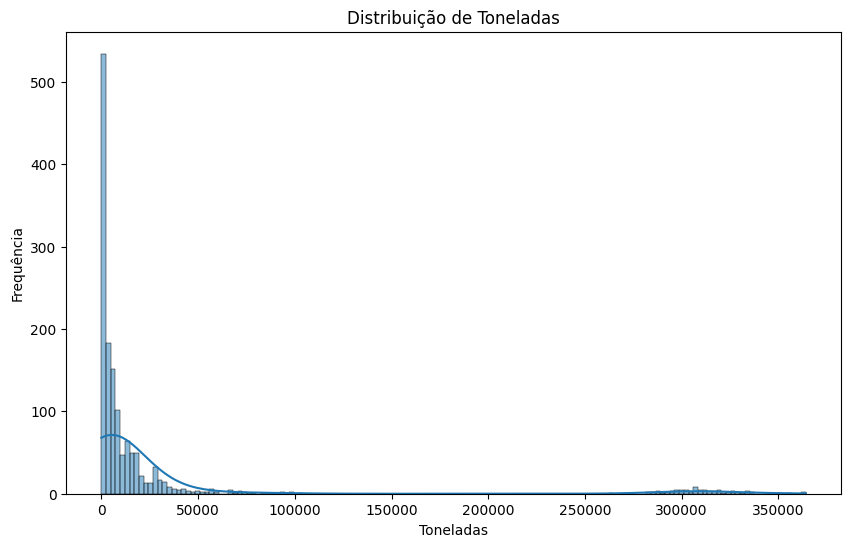

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(df_2013_2018['TONELADAS'], kde=True)
plt.title('Distribuição de Toneladas')
plt.xlabel('Toneladas')
plt.ylabel('Frequência')
plt.show()

### Gráfico de Barras para comparar a frequência de diferentes tipos de resíduos

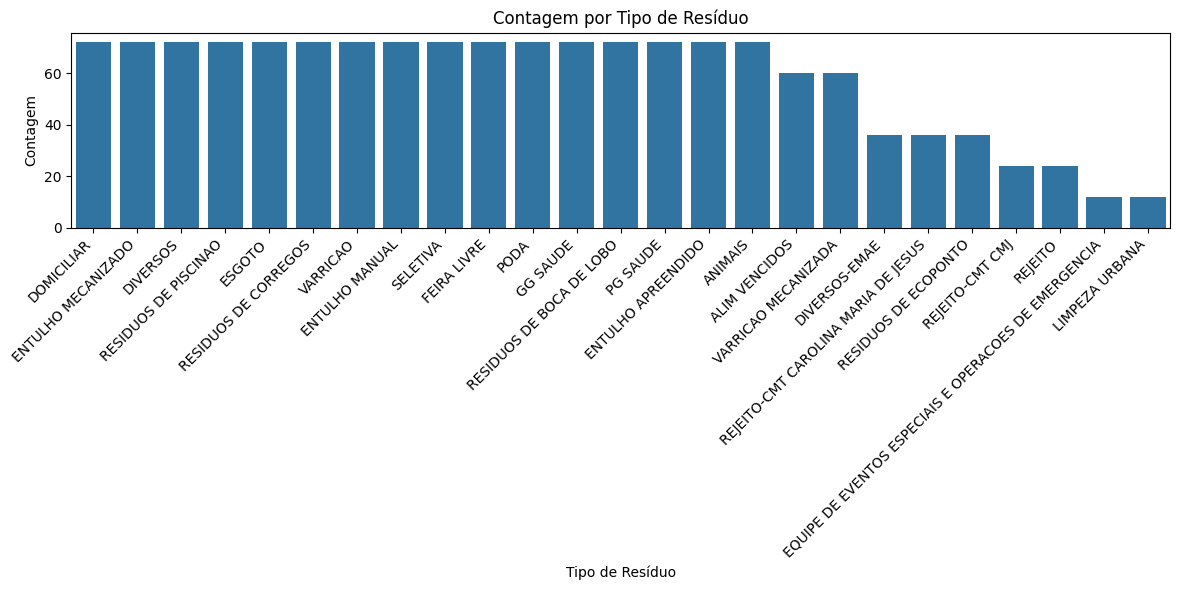

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df_2013_2018['TIPO DE RESIDUO'].value_counts().index,
            y=df_2013_2018['TIPO DE RESIDUO'].value_counts().values)
plt.title('Contagem por Tipo de Resíduo')
plt.xlabel('Tipo de Resíduo')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Gráfico de Linha para visualizar tendências ao longo do tempo

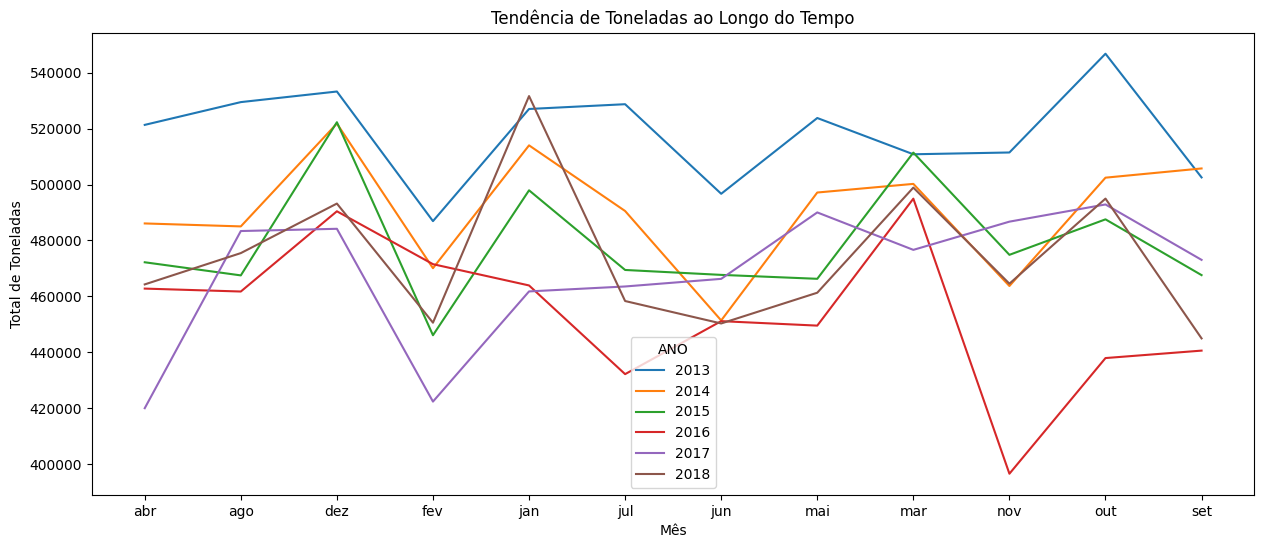

In [38]:
df_tendencia = df_2013_2018.groupby(['ANO', 'MES'])['TONELADAS'].sum().reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(data=df_tendencia, x='MES', y='TONELADAS', hue='ANO')
plt.title('Tendência de Toneladas ao Longo do Tempo')
plt.xlabel('Mês')
plt.ylabel('Total de Toneladas')
plt.show()

### Box Plots para identificar outliers e visualizar a distribuição de dados numéricos por tipo de resíduo

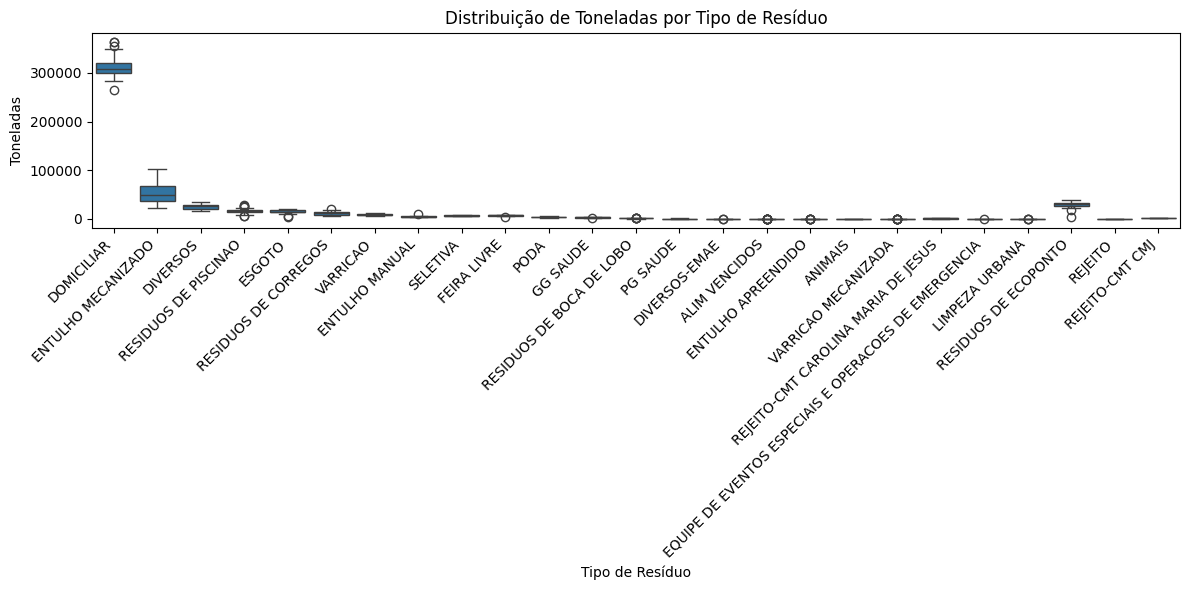

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='TIPO DE RESIDUO', y='TONELADAS', data=df_2013_2018)
plt.title('Distribuição de Toneladas por Tipo de Resíduo')
plt.xlabel('Tipo de Resíduo')
plt.ylabel('Toneladas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Origem dos Dados - Censo São Paulo

Estimativa da população residente nos municípios do Estado de São Paulo (considerando as estatísticas vitais e o Censo de 2022) ─ 2000 a 2023
https://repositorio.seade.gov.br/group/seade-populacao

## 1.   Pré-processamento de dados

### Leitura e entendimento dos dados

In [40]:
df_estimativa_pop_idade_sexo_esp = pd.read_csv("estimativa_pop_idade_sexo_esp.csv", encoding="latin1", sep=';')

print("\n\nNome das colunas do dataset de estimativa populacional:\n\n")
print(df_estimativa_pop_idade_sexo_esp.columns)

print("\n\nTamanho (linhas, colunas) do estimativa populacional:\n\n")
print(df_estimativa_pop_idade_sexo_esp.shape)

print("\n\nConteúdo das 10 linhas do estimativa populacional:\n\n")
print(df_estimativa_pop_idade_sexo_esp.head(10))



Nome das colunas do dataset de estimativa populacional:


Index(['ano', 'cod_ibge', 'nome_mun', 'sexo', 'idade', 'populacao'], dtype='object')


Tamanho (linhas, colunas) do estimativa populacional:


(577920, 6)


Conteúdo das 10 linhas do estimativa populacional:


      ano   cod_ibge    nome_mun    sexo    idade  populacao
0  2023.0  3500105.0  Adamantina  Homens  00 a 04      896.0
1  2023.0  3500105.0  Adamantina  Homens  05 a 09      885.0
2  2023.0  3500105.0  Adamantina  Homens  10 a 14      892.0
3  2023.0  3500105.0  Adamantina  Homens  15 a 19      952.0
4  2023.0  3500105.0  Adamantina  Homens  20 a 24     1066.0
5  2023.0  3500105.0  Adamantina  Homens  25 a 29     1115.0
6  2023.0  3500105.0  Adamantina  Homens  30 a 34     1279.0
7  2023.0  3500105.0  Adamantina  Homens  35 a 39     1285.0
8  2023.0  3500105.0  Adamantina  Homens  40 a 44     1279.0
9  2023.0  3500105.0  Adamantina  Homens  45 a 49     1115.0


## 2. Análise Exploratória

In [41]:
print("\n\nInformações gerais do dataset:\n\n")
df_estimativa_pop_idade_sexo_esp.info()

print("\n\nEstatísticas descritivas das colunas numéricas:\n\n")
print(df_estimativa_pop_idade_sexo_esp.describe())

print("\n\nEstatísticas descritivas das colunas categóricas:\n\n")
print(df_estimativa_pop_idade_sexo_esp.describe(include='object'))

print("\n\nValores únicos na coluna 'ano':\n\n")
print(df_estimativa_pop_idade_sexo_esp['ano'].unique())

print("\n\nValores únicos na coluna 'nome_mun':\n\n")
print(df_estimativa_pop_idade_sexo_esp['nome_mun'].unique())

print("\n\nValores únicos na coluna 'sexo':\n\n")
print(df_estimativa_pop_idade_sexo_esp['sexo'].unique())

print("\n\nValores únicos na coluna 'idade':\n\n")
print(df_estimativa_pop_idade_sexo_esp['idade'].unique())

print("\n\nValores únicos na coluna 'populacao':\n\n")
print(df_estimativa_pop_idade_sexo_esp['populacao'].unique())

print("\n\nNúmero de valores únicos na coluna 'nome_mun':\n\n")
print(df_estimativa_pop_idade_sexo_esp['nome_mun'].nunique())

print("\n\nContagem de valores na coluna 'nome_mun':\n\n")
print(df_estimativa_pop_idade_sexo_esp['nome_mun'].value_counts())

print("\n\nNúmero de valores nulos por coluna:\n\n")
print(df_estimativa_pop_idade_sexo_esp.isnull().sum())

print("\n\nProporção de valores nulos por coluna:\n\n")
print(df_estimativa_pop_idade_sexo_esp.isnull().mean())



Informações gerais do dataset:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577920 entries, 0 to 577919
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ano        576630 non-null  float64
 1   cod_ibge   576630 non-null  float64
 2   nome_mun   576630 non-null  object 
 3   sexo       576630 non-null  object 
 4   idade      576630 non-null  object 
 5   populacao  576630 non-null  float64
dtypes: float64(3), object(3)
memory usage: 26.5+ MB


Estatísticas descritivas das colunas numéricas:


                 ano      cod_ibge     populacao
count  576630.000000  5.766300e+05  5.766300e+05
mean     2011.979866  3.528698e+06  3.444617e+03
std         6.882337  1.668739e+04  5.454295e+04
min      2000.000000  3.500105e+06  0.000000e+00
25%      2006.000000  3.514601e+06  1.280000e+02
50%      2012.000000  3.528700e+06  3.430000e+02
75%      2018.000000  3.543204e+06  1.226000e+03
max      2023.000000  3.557303

## 3. Filtro para o município de São Paulo

In [42]:
df_sp_pop = df_estimativa_pop_idade_sexo_esp[df_estimativa_pop_idade_sexo_esp['nome_mun'] == 'São Paulo'].copy()

print("\n\nTamanho do dataset de estimativa populacional para São Paulo:\n\n")
print(df_sp_pop.shape)

print("\n\nConteúdo das 10 primeiras linhas para São Paulo:\n\n")
print(df_sp_pop.head(10))



Tamanho do dataset de estimativa populacional para São Paulo:


(894, 6)


Conteúdo das 10 primeiras linhas para São Paulo:


          ano   cod_ibge   nome_mun    sexo    idade  populacao
22480  2023.0  3550308.0  São Paulo  Homens  00 a 04   299220.0
22481  2023.0  3550308.0  São Paulo  Homens  05 a 09   342720.0
22482  2023.0  3550308.0  São Paulo  Homens  10 a 14   333278.0
22483  2023.0  3550308.0  São Paulo  Homens  15 a 19   362054.0
22484  2023.0  3550308.0  São Paulo  Homens  20 a 24   416927.0
22485  2023.0  3550308.0  São Paulo  Homens  25 a 29   427101.0
22486  2023.0  3550308.0  São Paulo  Homens  30 a 34   425797.0
22487  2023.0  3550308.0  São Paulo  Homens  35 a 39   448337.0
22488  2023.0  3550308.0  São Paulo  Homens  40 a 44   446534.0
22489  2023.0  3550308.0  São Paulo  Homens  45 a 49   375362.0


In [43]:
# Período de tempo abrangido pelas estimativas populacionais para São Paulo
df_sp_pop['ano'] = df_sp_pop['ano'].astype(int)
print(df_sp_pop)

         ano   cod_ibge   nome_mun      sexo    idade  populacao
22480   2023  3550308.0  São Paulo    Homens  00 a 04   299220.0
22481   2023  3550308.0  São Paulo    Homens  05 a 09   342720.0
22482   2023  3550308.0  São Paulo    Homens  10 a 14   333278.0
22483   2023  3550308.0  São Paulo    Homens  15 a 19   362054.0
22484   2023  3550308.0  São Paulo    Homens  20 a 24   416927.0
...      ...        ...        ...       ...      ...        ...
573837  2000  3550308.0  São Paulo  Mulheres  60 a 64   169702.0
573838  2000  3550308.0  São Paulo  Mulheres  65 a 69   137785.0
573839  2000  3550308.0  São Paulo  Mulheres  70 a 74   115863.0
573840  2000  3550308.0  São Paulo  Mulheres   75 e +   154053.0
573841  2000  3550308.0  São Paulo  Mulheres    Total  5457457.0

[894 rows x 6 columns]


In [44]:
# Obtenção da estimativa da população total por ano
df_pop_anual_sp = df_sp_pop.groupby('ano')['populacao'].sum().reset_index()
df_pop_anual_sp.rename(columns={'populacao': 'populacao_total'}, inplace=True)

print("\n\nEstimativa da população total anual para São Paulo:\n\n")

print(df_pop_anual_sp)



Estimativa da população total anual para São Paulo:


     ano  populacao_total
0   2000       20852768.0
1   2001       21050734.0
2   2002       21227382.0
3   2003       21396762.0
4   2004       21564592.0
5   2005       21731146.0
6   2006       21889778.0
7   2007       22038968.0
8   2008       22187492.0
9   2009       22336388.0
10  2010       22491966.0
11  2011       22563576.0
12  2012       22636142.0
13  2013       22702892.0
14  2014       22768422.0
15  2015       22837642.0
16  2016       22894574.0
17  2017       22942398.0
18  2018       22987018.0
19  2019       23018230.0
20  2020       23015200.0
21  2021       22961800.0
22  2022       22901218.0
23  2023       22859730.0


## 4. Normalização de Dados

In [45]:
# Conversão para o tipo inteiro em ambos os dataframes
df_2013_2018['ANO'] = df_2013_2018['ANO'].astype(int)
df_pop_anual_sp['ano'] = df_pop_anual_sp['ano'].astype(int)

In [46]:
# Agrupamento do df_2013_2020 pela coluna 'ANO' com soma da coluna 'TONELADAS' para obter a quantidade total de resíduos por ano
df_residuos_anual = df_2013_2018.groupby('ANO')['TONELADAS'].sum().reset_index()
df_residuos_anual.rename(columns={'ANO': 'ano', 'TONELADAS': 'total_toneladas'}, inplace=True)

print("\nDados de resíduos agregados anualmente:\n", df_residuos_anual)


Dados de resíduos agregados anualmente:
     ano  total_toneladas
0  2013      6219039.460
1  2014      5888181.196
2  2015      5750715.950
3  2016      5452934.860
4  2017      5620564.340
5  2018      5688310.140


In [47]:
# Merge do DataFrame de resíduos anuais com o dataFrame de população anual do estado de São Paulo com base na coluna 'ano'
df_modelagem = pd.merge(df_residuos_anual, df_pop_anual_sp, on='ano', how='inner')
print("\nDataFrame unificado para modelagem:\n", df_modelagem)


DataFrame unificado para modelagem:
     ano  total_toneladas  populacao_total
0  2013      6219039.460       22702892.0
1  2014      5888181.196       22768422.0
2  2015      5750715.950       22837642.0
3  2016      5452934.860       22894574.0
4  2017      5620564.340       22942398.0
5  2018      5688310.140       22987018.0


# Modelagem Preditiva

## Scatter plot da relação entre resíduos e população

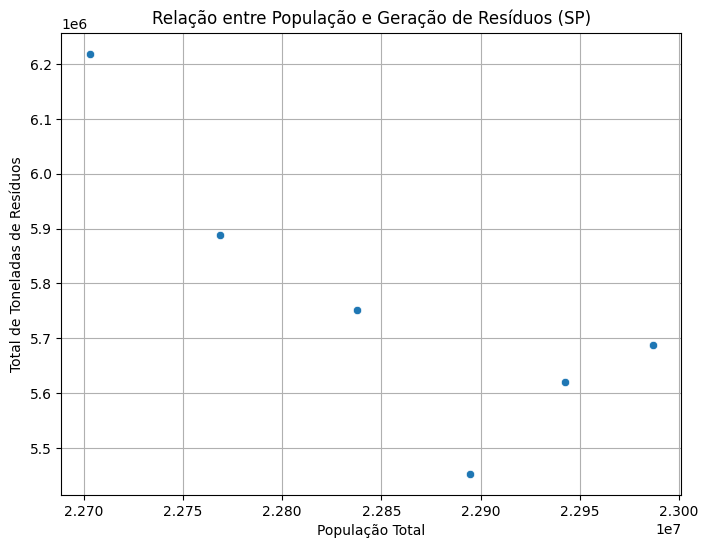

In [48]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='populacao_total', y='total_toneladas', data=df_modelagem)
plt.title('Relação entre População e Geração de Resíduos (SP)')
plt.xlabel('População Total')
plt.ylabel('Total de Toneladas de Resíduos')
plt.grid(True)
plt.show()

Este é um scatter plot dos mesmos dados, mas sem a linha de regressão. Ele mostra a dispersão dos pontos, indicando a relação entre as duas variáveis sem a imposição de um modelo linear. Podemos observar uma tendência geral de queda na geração de resíduos conforme a população aumenta ligeiramente ao longo dos anos.

## Tendência da geração de resíduos ao longo do tempo

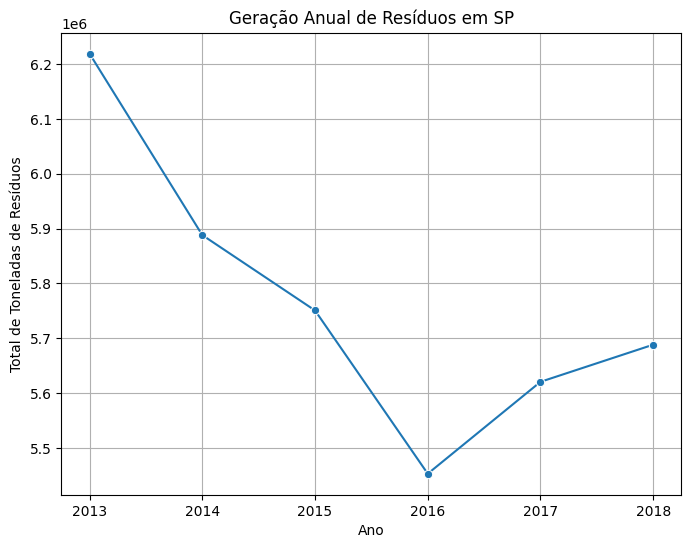

In [49]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='ano', y='total_toneladas', data=df_modelagem, marker='o')
plt.title('Geração Anual de Resíduos em SP')
plt.xlabel('Ano')
plt.ylabel('Total de Toneladas de Resíduos')
plt.grid(True)
plt.show()

Este é um gráfico de linha mostrando a evolução da geração total de resíduos no estado de São Paulo ao longo dos anos de 2013 a 2018.

A linha com marcadores indica uma tendência de queda na geração de resíduos durante esse período, com uma pequena recuperação em 2017 e 2018.

## Tendência da população ao longo do tempo

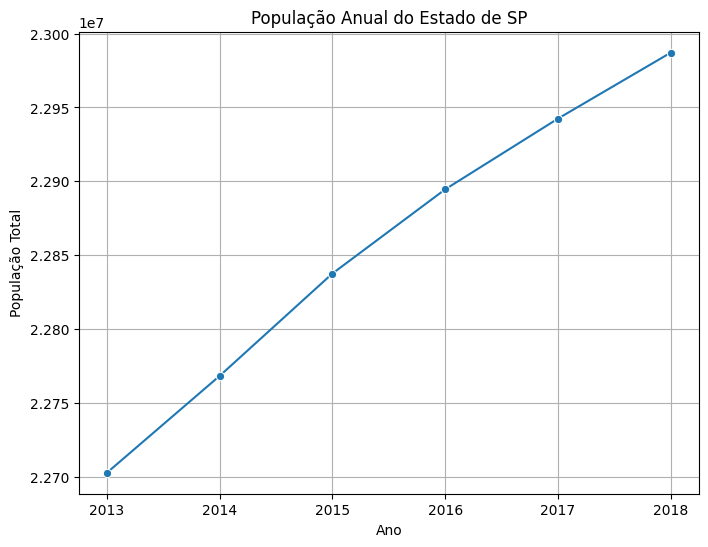

In [50]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='ano', y='populacao_total', data=df_modelagem, marker='o')
plt.title('População Anual do Estado de SP')
plt.xlabel('Ano')
plt.ylabel('População Total')
plt.grid(True)
plt.show()

Este é um gráfico de linha mostrando a evolução da população total do estado de São Paulo ao longo dos anos de 2013 a 2018.

A linha com marcadores indica uma tendência de crescimento da população durante esse período, embora o aumento não seja acentuado.

## Construção e Treinamento do Modelo (Regressão Linear

In [51]:
from sklearn.linear_model import LinearRegression

X = df_modelagem[['populacao_total']]
y = df_modelagem['total_toneladas']

modelo_linear = LinearRegression()
modelo_linear.fit(X, y)

# Coeficientes do modelo
print(f'Intercepto: {modelo_linear.intercept_:.2f}')
print(f'Coeficiente da População: {modelo_linear.coef_[0]:.8f}')

Intercepto: 51266760.50
Coeficiente da População: -1.99062898


**Interpretação dos Dados da Regressão Linear:**

*   Intercepto: 51266760.50

Este é o valor estimado da geração total de resíduos (em toneladas) quando a população total é zero. Em um contexto real, uma população zero é impossível, então o intercepto serve principalmente como um parâmetro do modelo. Ele pode ser interpretado como um ponto de partida teórico da geração de resíduos, desconsiderando a influência da população.

*   Coeficiente da População: -1.99062898

Este coeficiente sugere que, para cada aumento de uma pessoa na população do estado de São Paulo, a geração total de resíduos tende a diminuir em aproximadamente 1.99 toneladas, de acordo com este modelo linear e dentro do período de 2013 a 2018.

## Avaliação do Modelo

R-quadrado: 0.6602


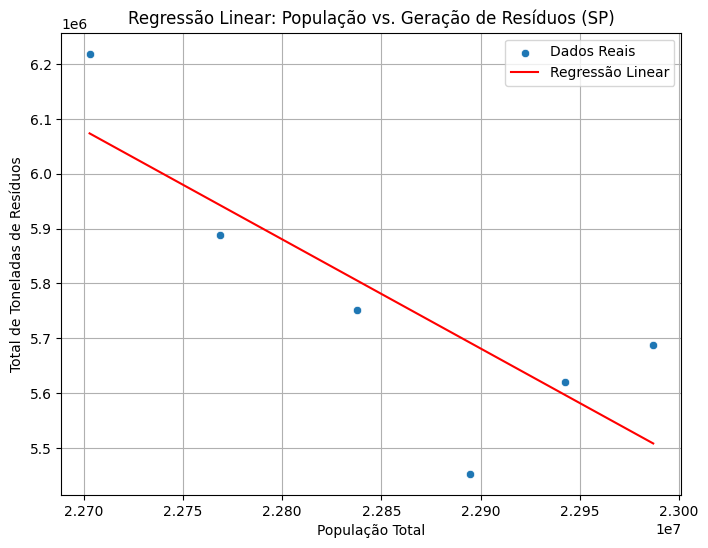

In [52]:
from sklearn.metrics import r2_score

y_pred = modelo_linear.predict(X)
r_squared = r2_score(y, y_pred)
print(f'R-quadrado: {r_squared:.4f}')

# Plot dos dados reais vs. a linha de regressão
plt.figure(figsize=(8, 6))
sns.scatterplot(x='populacao_total', y='total_toneladas', data=df_modelagem, label='Dados Reais')
plt.plot(X, y_pred, color='red', label='Regressão Linear')
plt.title('Regressão Linear: População vs. Geração de Resíduos (SP)')
plt.xlabel('População Total')
plt.ylabel('Total de Toneladas de Resíduos')
plt.legend()
plt.grid(True)
plt.show()

Este é um scatter plot mostrando a relação entre a população total do estado de São Paulo (eixo x) e o total de toneladas de resíduos gerados no estado (eixo y) para os anos de 2013 a 2018.

A linha vermelha representa a linha de regressão linear ajustada aos dados. Ela tenta capturar a tendência linear entre as duas variáveis.

O valor de R-quadrado (0.6602) indica a proporção da variância na geração de resíduos que é explicada pela variação na população. Um valor de 0.6602 sugere que aproximadamente 66% da variação na geração de resíduos pode ser explicada pela população, dentro do período analisado.

# Resultados

Os gráficos mostram uma leve tendência de aumento na população e uma tendência de queda na geração de resíduos no estado de São Paulo entre 2013 e 2018.

O modelo de regressão linear ajustado aos dados sugere uma relação negativa entre a população e a geração de resíduos nesse período. O coeficiente negativo indica que, conforme a população aumentou ligeiramente, a geração de resíduos tendeu a diminuir.

O R-quadrado de 0.6602 indica que o modelo linear explica uma parte considerável da variabilidade na geração de resíduos com base na população, mas ainda há outros fatores em jogo que não estão sendo capturados por este modelo.

Mesmo que o modelo mostre uma relação estatística, isso não significa que o aumento da população causou a diminuição dos resíduos. Outros fatores (como mudanças em hábitos de consumo, políticas de reciclagem mais eficazes, desenvolvimento econômico, etc.) podem estar influenciando essa tendência.

O modelo foi construído com apenas 6 pontos de dados (anos). Uma amostra tão pequena pode levar a resultados que não são representativos de tendências de longo prazo ou de relações causais reais. O modelo pode ser sensível a valores atípicos ou a características específicas desse período.